# Analyzing images of disturbed lines

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid_tools as vt
import py.metrics_disturb as me
from py.tools.imshow import imshow
import matplotlib.pyplot as plt
import py.file_handling as fh
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measure videos

measure all videos

In [ ]:
errorFolders = me.measureFolders(os.path.join(cfg.path.server, r'singleDisturb'))
errorFolders

In [110]:
errorFolders

[]

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbHoriz2_0.500\disturbHoriz2_0.500_horizMeasure_I_M9_S_4.00_220930_155109_0.csv


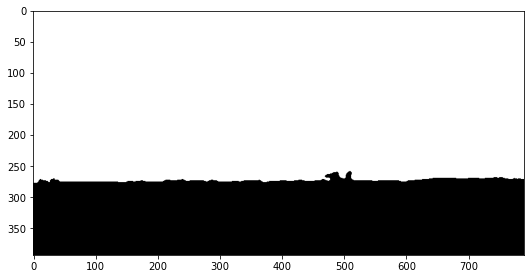

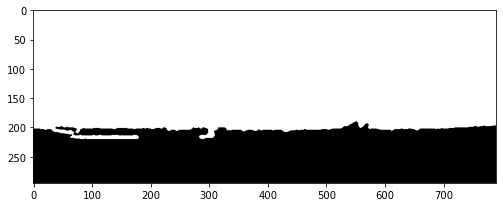

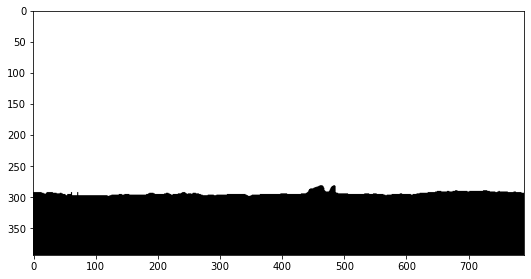

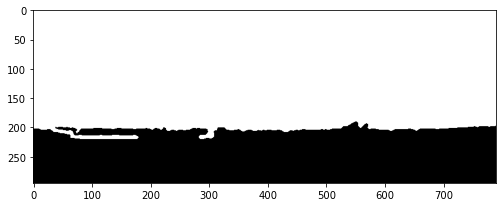

In [18]:
me.horizDisturbMeasures(errorFolders[0])

In [22]:
fh.openExplorer(folder)

## xs

#### individual folders

singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbXS_+z_0.875,disturbXS_+z_0.875_vstill_HOx_l3do_I_M9_S_4.00_220930_160711_5.png,41,55


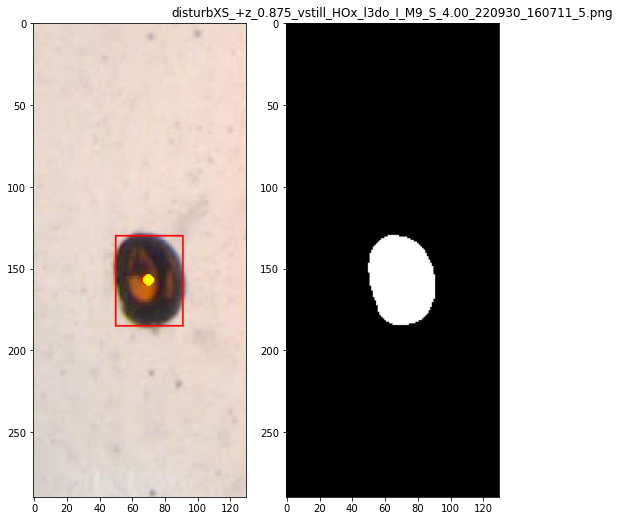

In [88]:
fstr = r'singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbXS_+z_0.875'
fistr = 'disturbXS_+z_0.875_vstill_HOx_l3do_I_M9_S_4.00_220930_160711_5.png'
folder = os.path.join(cfg.path.server, fstr)
file = os.path.join(folder, fistr)
d,u = me.xsDisturbMeasure(file, diag=1)
if 'w' in d:
    w = d['w']
    h = d['h']
else:
    w = -1
    h = -1
print(f'{fstr},{fistr},{w},{h}')

INFO: Exported \\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250\disturbXS_+y_1.250_xsMeasure_I_3.00_S_2.50_220928_163204_6.csv


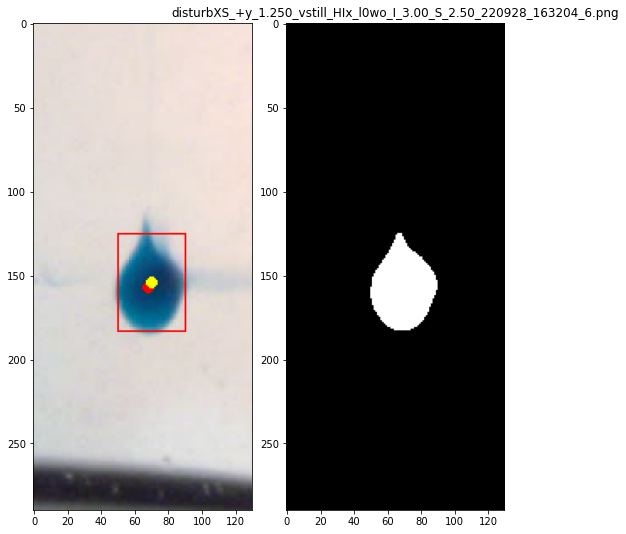

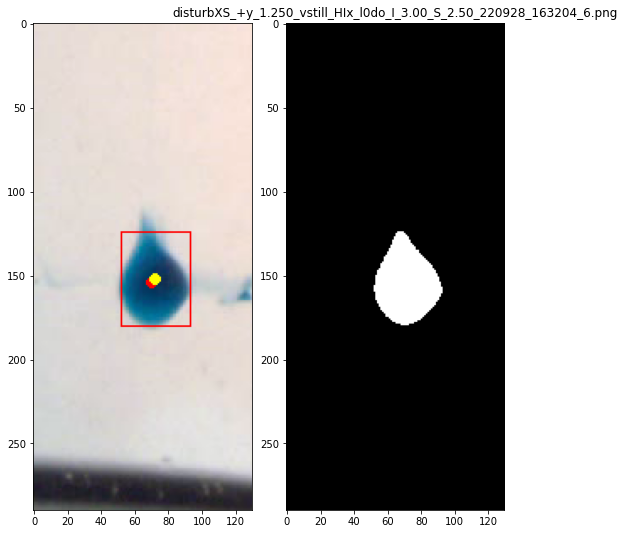

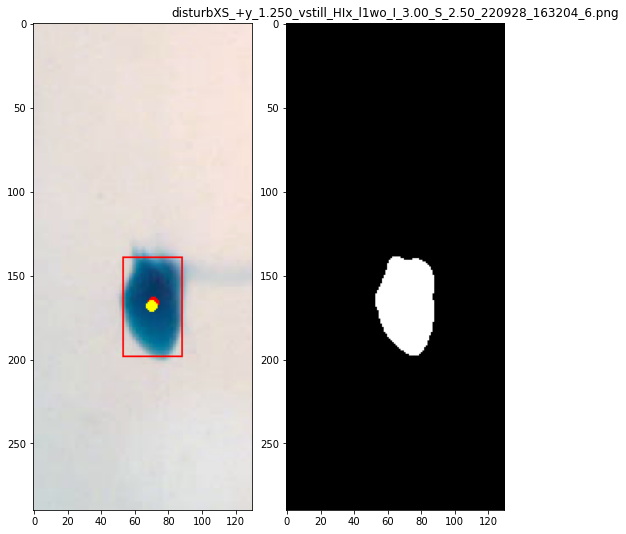

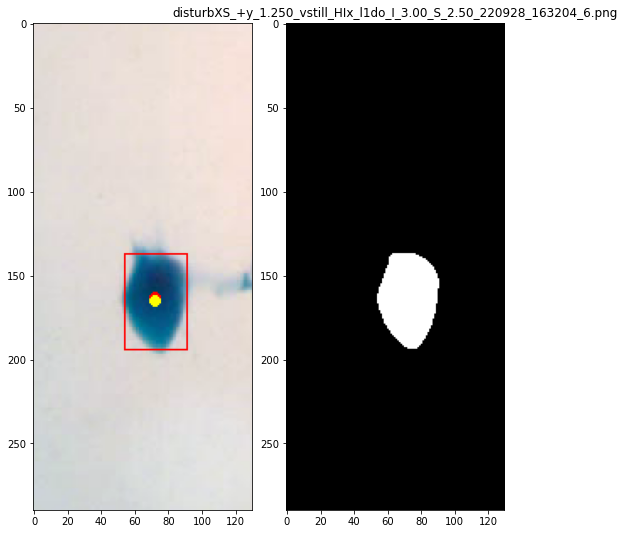

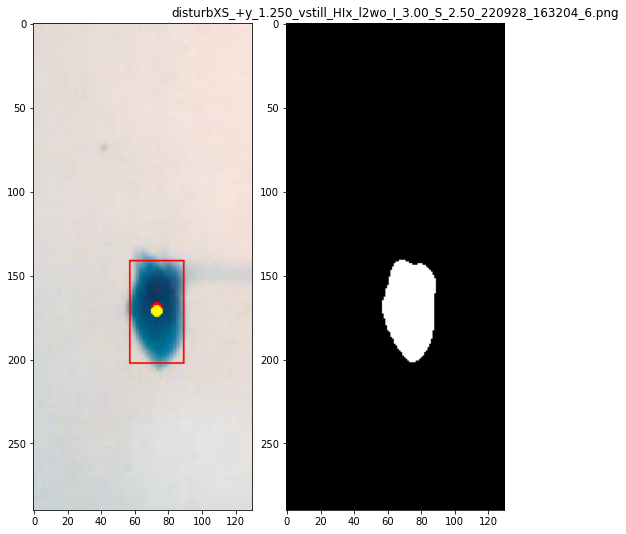

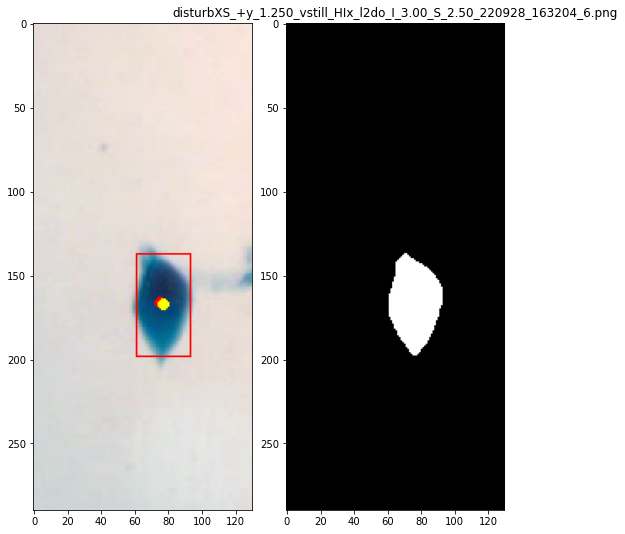

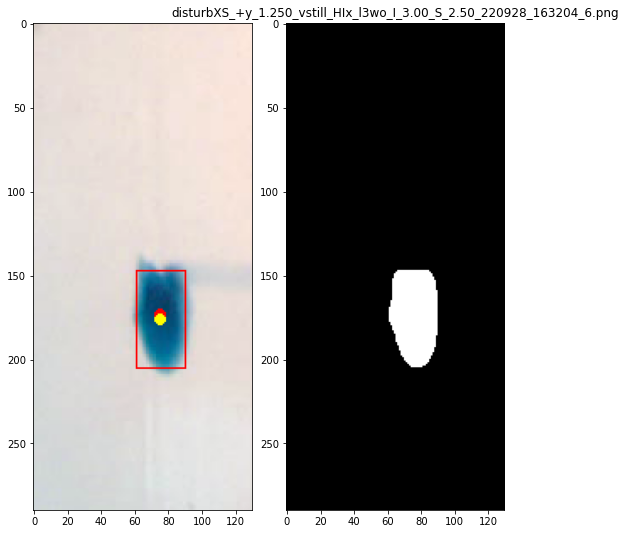

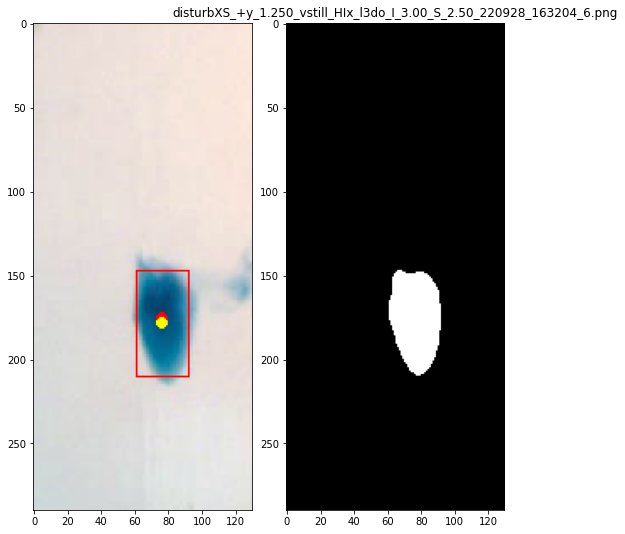

In [13]:
me.xsDisturbMeasures(r'\\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250', overwrite=True, diag=1)

### unit test

In [89]:
run ../../tests/test_disturbXS

..............................

[]



----------------------------------------------------------------------
Ran 30 tests in 7.320s

OK


In [65]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbXS.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

{'i': 8, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbXS_+z_1.000', 'file': 'disturbXS_+z_1.000_vstill_HOx_l3do_I_3.00_S_2.50_220928_163729_2.png', 'w': 36, 'h': 66, 'w0': 38, 'h0': 71}


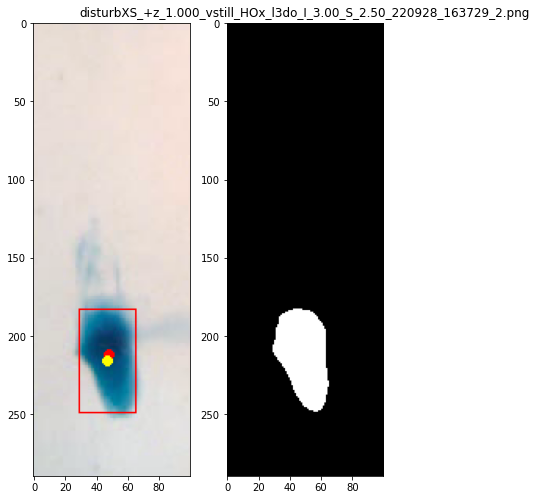

In [66]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [8]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.xsDisturbMeasure(file, diag=1)
    if 'w' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':d['w'], 'h':d['h'], 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':0, 'h':0, 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})

## vert

### individual folders

In [9]:
aa = np.array([[1,2,4],[1,2,4]])
aa.sum()

14

INFO: Threshold: 190, product: 31.014319111630627, white:80
{}
{'w': 0, 'h': 0}


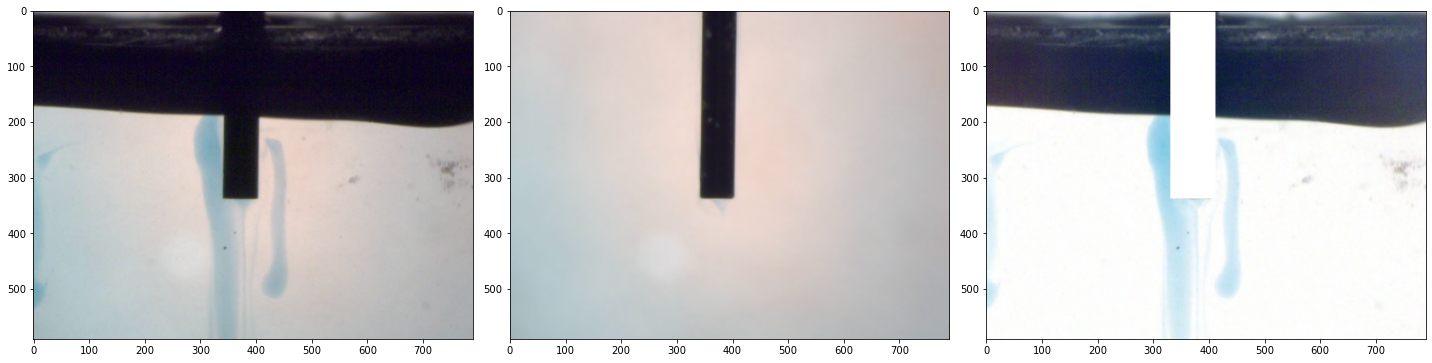

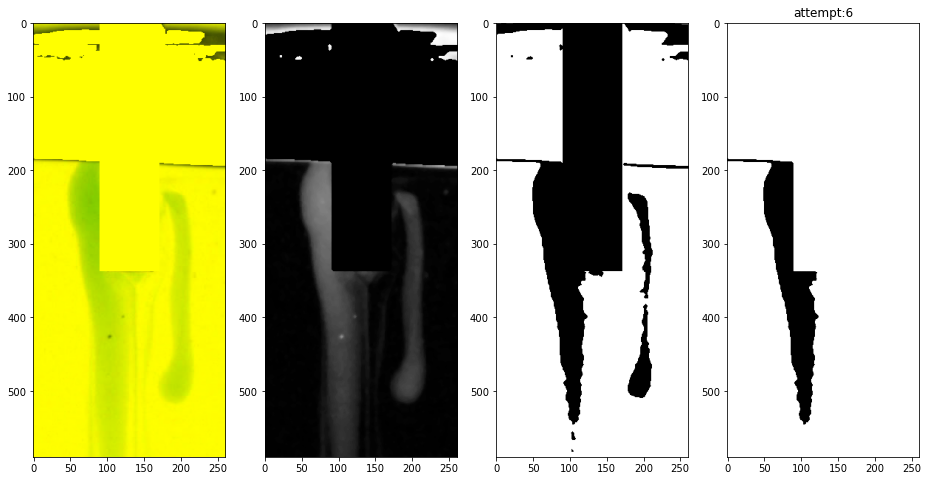

In [12]:
folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250')
file = os.path.join(folder, 'disturbVert_1.250_vstill_V_l1d_I_3.00_S_2.50_220928_162434_6.png')
d,u = me.vertDisturbMeasure(file, diag=3)
print(d)
if 'w' in d:
    print({'w':d['w'], 'h':d['h']})
else:
    print({ 'w':0, 'h':0})

### unit test

In [11]:
run ../../tests/test_disturbVert

.................................

[]



----------------------------------------------------------------------
Ran 33 tests in 21.347s

OK


In [10]:
fh.openExplorer(cdir)

In [5]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbVert.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

{'i': 24, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v1\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l2do_I_3.00_S_2.25_220928_152907_9.png', 'w': 107, 'h': 277, 'w0': 92, 'h0': 272}
{'i': 27, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v1\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l0wo_I_3.00_S_2.25_220928_152907_9.png', 'w': 110, 'h': 250, 'w0': 98, 'h0': 247}
{'i': 28, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v2\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l2d_I_3.00_S_2.25_220928_153448_4.png', 'w': 92, 'h': 405, 'w0': 66, 'h0': 404}


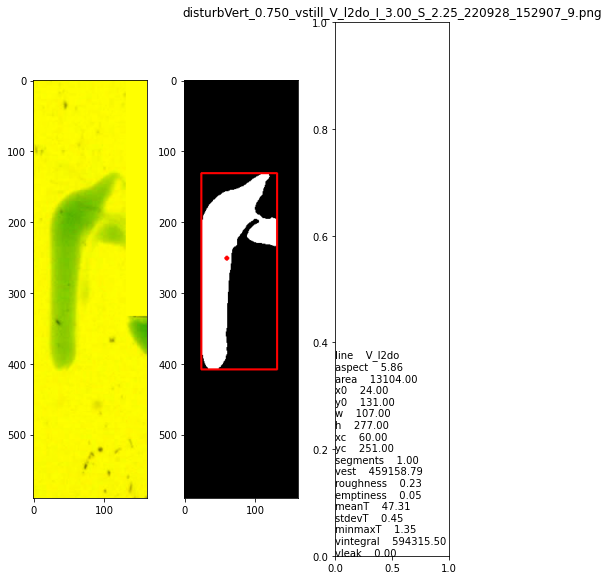

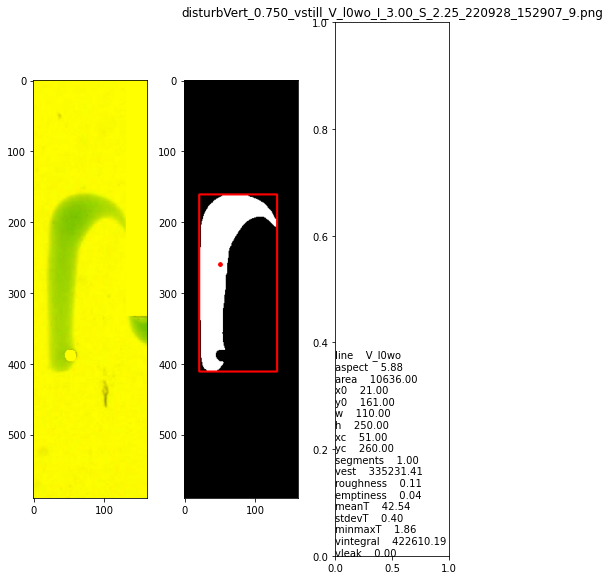

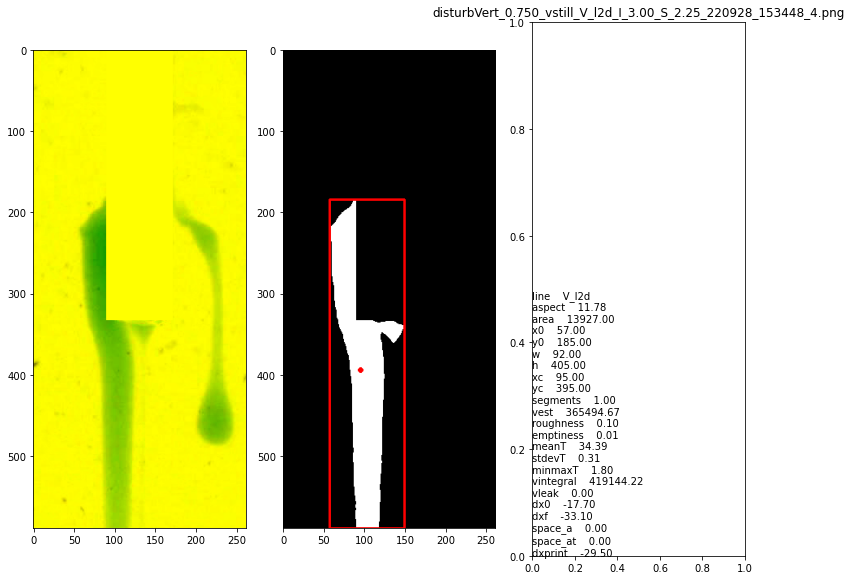

In [9]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [24, 27, 28]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.vertDisturbMeasure(file, diag=1)
    if 'w' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':d['w'], 'h':d['h'], 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':0, 'h':0, 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})

In [11]:
me.vertDisturbMeasures(os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250'), overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250\disturbVert_1.250_vertMeasure_I_3.00_S_2.50_220928_162434_6.csv


### horiz

### individual files

In [26]:
import time

In [36]:
tic = time.perf_counter()
pv = me.printVals(folder, fluidProperties=False)
print(time.perf_counter()-tic)

0.12722800000005918


In [95]:
arr = np.array([[255,0,255,0,0],[255,0,255,255,0],[0,0,255,0,0],[255,0,255,0,0]])
a2 = np.stack(np.where(arr)).transpose()
idx = np.where(np.diff(a2[:,0])!=0)[0]+1
a3 = np.split(a2,list(idx))
np.array([[i[0,1],i[-1,1]] for i in a3])

array([[0, 2],
       [0, 3],
       [2, 2],
       [0, 2]], dtype=int64)

INFO: Threshold: 190, product: 10.687216156150352, white:80
singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500,disturbHoriz_0.500_vstill_HOh_l2w_I_3.00_S_2.50_220928_155034_3.png,2,350,26


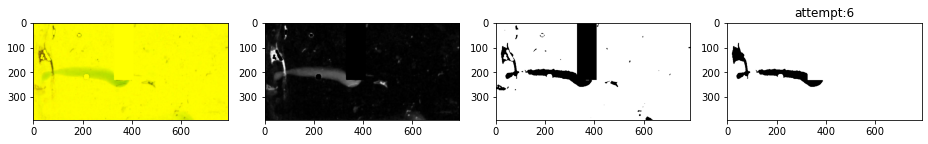

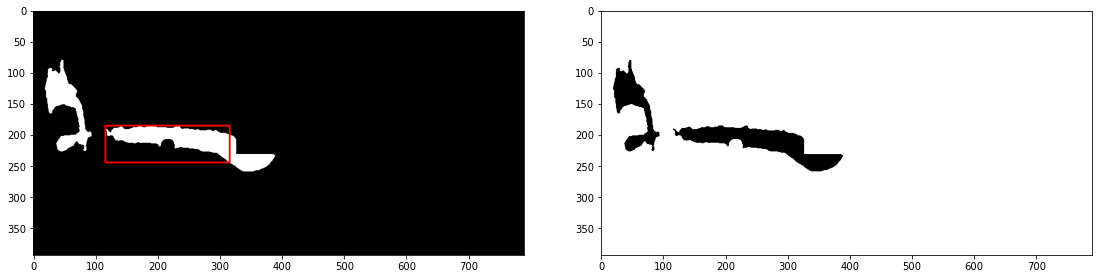

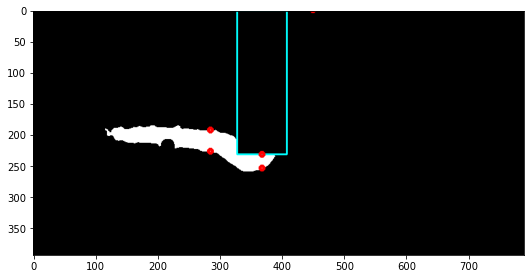

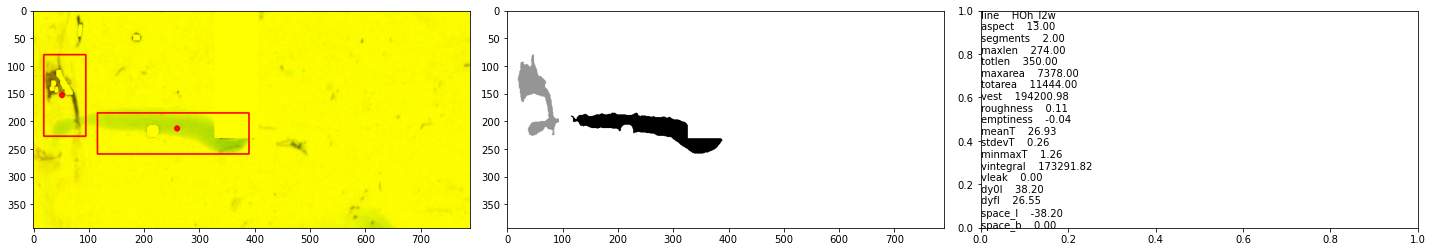

In [108]:
fstr = r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500'
fistr = 'disturbHoriz_0.500_vstill_HOh_l2w_I_3.00_S_2.50_220928_155034_3.png'
folder = os.path.join(cfg.path.server, fstr)
file = os.path.join(folder, fistr)
d,u = me.horizDisturbMeasure(file, diag=2)
if 'segments' in d:
    segments = d['segments']
    totlen = int(d['totlen'])
    meanT = int(d['meanT'])
else:
    segments=-1
    totlen=-1
    meanT=-1
print(f'{fstr},{fistr},{segments},{totlen},{meanT}')

### unit test

In [19]:
run ../../tests/test_disturbHoriz

....................

[]



----------------------------------------------------------------------
Ran 20 tests in 16.612s

OK


In [21]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbHoriz.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

INFO: Threshold: 190, product: 26.955406319451154, white:80
{'i': 15, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbHoriz_0.625', 'file': 'disturbHoriz_0.625_vstill_HOh_l2d_I_3.00_S_2.50_220928_155114_2.png', 'segments': 1, 'totlen': 582, 'meanT': 34.97766323024055, 'segments0': 1, 'totlen0': 582, 'meanT0': 34}


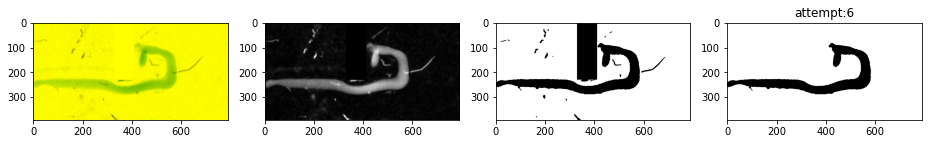

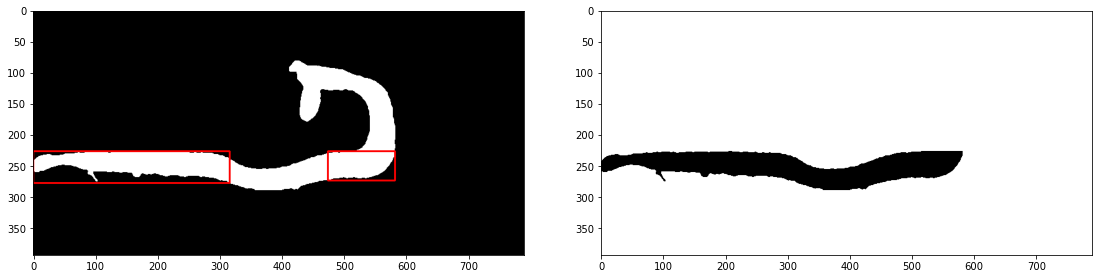

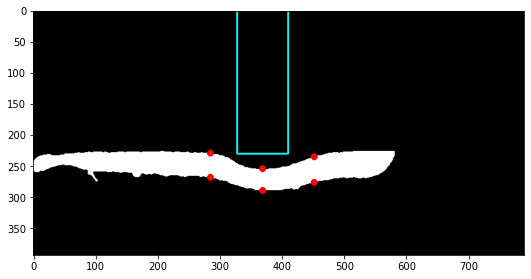

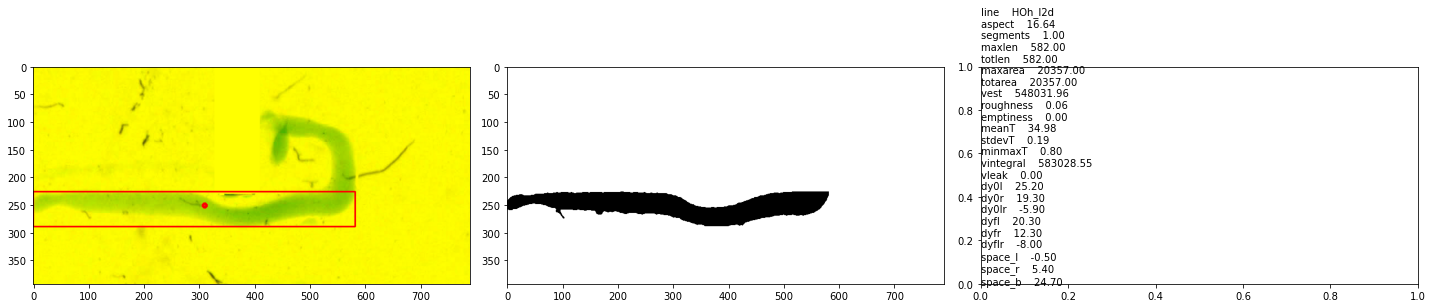

In [33]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [15]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.horizDisturbMeasure(file, diag=2)
    if 'segments' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file']
               , 'segments':d['segments'], 'totlen':d['totlen'], 'meanT':d['meanT']
               , 'segments0':testlist.loc[i,'segments'], 'totlen0':testlist.loc[i, 'totlen'], 'meanT0':testlist.loc[i, 'meanT']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file']
               , 'segments':0, 'totlen':0, 'meanT':0
               , 'segments0':testlist.loc[i,'segments'], 'totlen0':testlist.loc[i, 'totlen'], 'meanT0':testlist.loc[i, 'meanT']})

In [23]:
fstr = r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500'
fistr = 'disturbHoriz_0.500_vstill_HOh_l0d_I_3.00_S_2.50_220928_155034_3.png'
folder = os.path.join(cfg.path.server, fstr)
me.horizDisturbMeasures(folder, overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500\disturbHoriz_0.500_horizMeasure_I_3.00_S_2.50_220928_155034_3.csv
